# **Load Packages**

In [1]:
import warnings
warnings.filterwarnings(action = 'ignore')

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer

# **Load and Understand the Data**

In [2]:
# Load dataset
df_raw = pd.read_csv('Telco Customer.csv')

In [3]:
print('Show dataset:')
df_raw.head()

Show dataset:


,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print('Information about dataset:')
df_raw.info()

Information about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBillin

# **Data Preparation and Exploration**

In [5]:
df_prep = df_raw.copy()

In [6]:
print(f'Show number of unique values based on feature \'Customer ID\' feature: {df_prep['CustomerID'].nunique()}')

print(f'\nDataset contains {df_prep.duplicated().sum()} duplicated values')

Show number of unique values based on feature 'Customer ID' feature: 7043

Dataset contains 0 duplicated values


<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
Setelah dilakukan pengecekan terhadap <b>tipe data</b> pada dataset, ditemukan bahwa fitur <code>TotalCharges</code> memiliki <b>tipe data berupa objek</b>. Hal ini tentu tidak sesuai, mengingat <code>TotalCharges</code> merepresentasikan <b>total tagihan</b> yang telah dibayarkan oleh pelanggan sejak awal berlangganan. Dengan karakteristik tersebut, seharusnya fitur ini bertipe <b>numerik</b>, agar dapat mencerminkan nilai kuantitatif yang sesungguhnya. Oleh karena itu, akan dilakukan <b>konversi tipe data</b> pada <code>TotalCharges</code> menjadi tipe <b>numerik</b>, sehingga fitur ini dapat digunakan secara <b>optimal dalam proses analisis lanjutan</b>.
</p>

In [7]:
df_prep['TotalCharges'] = pd.to_numeric(df_prep['TotalCharges'], errors = 'coerce')

In [8]:
print('Information about dataset:')
df_prep.info()

Information about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBillin

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
Langkah selanjutnya yang akan dilakukan dalam proses <b>pemrosesan data</b> adalah melakukan <b>pengecekan terhadap missing values</b> pada dataset. Tindakan ini bertujuan untuk memastikan bahwa seluruh data yang tersedia berada dalam <b>kondisi lengkap</b> dan <b>layak digunakan</b> dalam proses analisis.
</p>

In [9]:
print('Show number of missing values:')
df_prep.isnull().sum()

Show number of missing values:


CustomerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
Berdasarkan hasil <b>pengecekan awal</b>, ditemukan bahwa fitur <code>TotalCharges</code> mengandung sejumlah <b>missing values</b> yang perlu mendapatkan perhatian khusus. Untuk itu, akan dilakukan <b>analisis lanjutan</b> guna mengidentifikasi <b>penyebab munculnya nilai yang hilang</b> pada fitur <code>TotalCharges</code>. Langkah ini penting agar dapat ditentukan <b>strategi penanganan yang tepat</b>, sekaligus memastikan <b>integritas</b> dan <b>kelengkapan data</b> tetap terjaga dalam proses analisis selanjutnya.
</p>

In [10]:
df_prep[df_prep['TotalCharges'].isnull()]

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
Setelah dilakukan <b>pengecekan lebih lanjut</b>, ditemukan bahwa <b>missing values</b> pada fitur <code>TotalCharges</code> disebabkan oleh pelanggan yang <b>baru mulai berlangganan</b>, yaitu dengan masa langganan <b>kurang dari satu bulan</b>. Kondisi ini menjelaskan alasan mengapa <b>data total tagihan</b> belum tersedia untuk kelompok pelanggan tersebut. Sebagai solusi, <b>missing values</b> pada fitur <code>TotalCharges</code> akan diisi menggunakan nilai dari fitur <code>MonthlyCharges</code>, karena nilai tersebut dianggap dapat merepresentasikan <b>estimasi tagihan awal</b> bagi pelanggan yang baru bergabung.
</p>

In [11]:
df_prep['TotalCharges'] = df_prep['TotalCharges'].fillna(df_prep['MonthlyCharges'])

In [12]:
print('Show number of missing values:')
df_prep.isnull().sum()

Show number of missing values:


CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
Selanjutnya, akan dilakukan <b>analisis distribusi data</b> pada fitur-fitur bertipe <b>numerik</b>. Tujuan dari langkah ini adalah untuk memahami <b>pola penyebaran nilai</b> serta memperoleh <b>gambaran umum</b> mengenai <b>karakteristik data numerik</b> yang dimiliki oleh dataset.
</p>

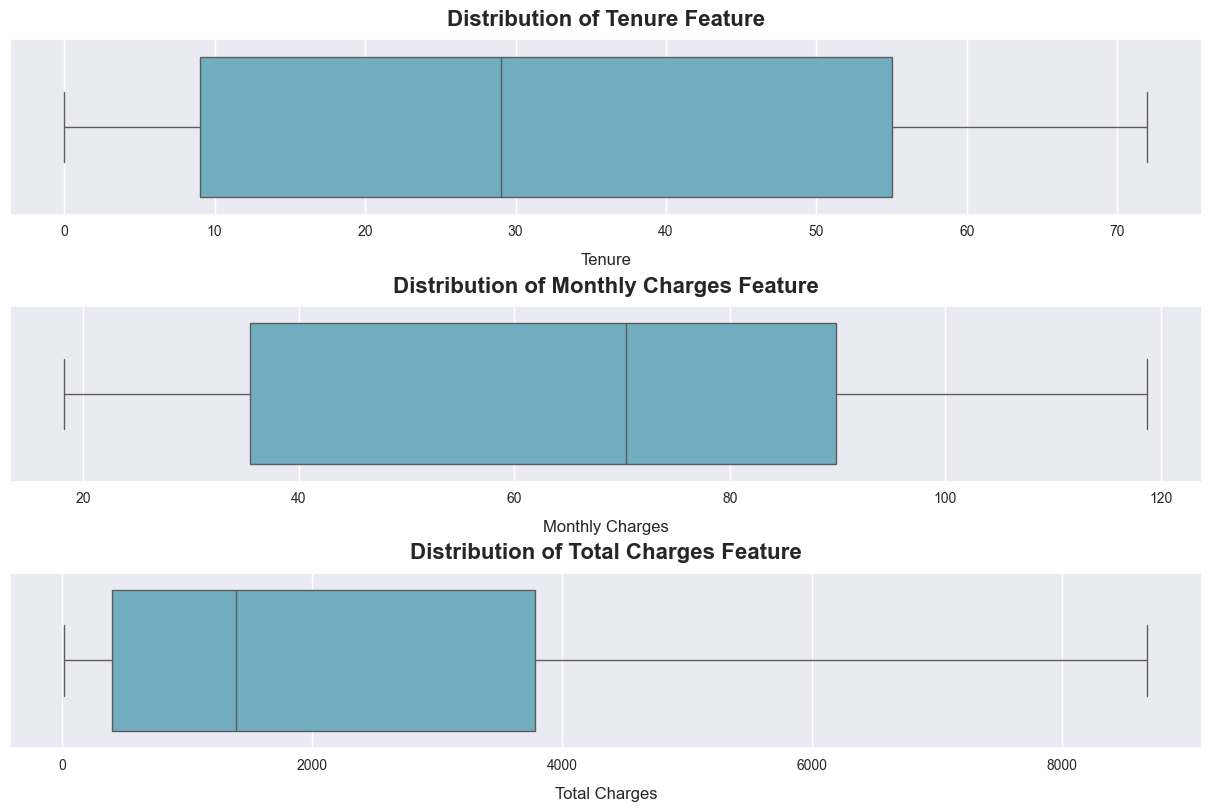

In [13]:
# Get features with numerical type
columns_to_visualize = df_prep.select_dtypes(exclude = 'object')

# Set the name of each feature
name_of_columns = ['Tenure', 'Monthly Charges', 'Total Charges']

sns.set_style(style = 'darkgrid') # Set the seaborn style

fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (12,8), constrained_layout = True) # Set the subplots

# Create the plot
for ax, column, column_names in zip(axs.flatten(), columns_to_visualize, name_of_columns):
    sns.boxplot(data = df_prep, x = column, color = '#64b5cd', ax = ax)

    # Set the title and label
    ax.set_title(f'Distribution of {column_names} Feature', pad = 10, fontsize = 16, fontweight = 'bold')

    ax.set_xlabel(column_names, labelpad = 10, fontsize = 12)

# Show the plot
plt.show()

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
Selain dilakukan pada fitur-fitur bertipe <b>numerik</b>, <b>analisis distribusi data</b> juga akan diterapkan pada fitur-fitur bertipe <b>kategorik</b>. Langkah ini bertujuan untuk memahami <b>proporsi</b> dan <b>pola kemunculan setiap kategori</b>, sehingga dapat memberikan <b>gambaran menyeluruh</b> mengenai karakteristik data dalam bentuk non-numerik.
</p>

MemoryError: bad allocation

<Figure size 1200x845160 with 1 Axes>

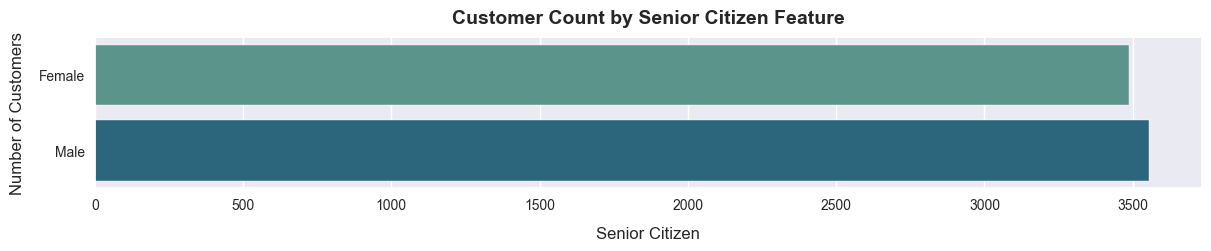

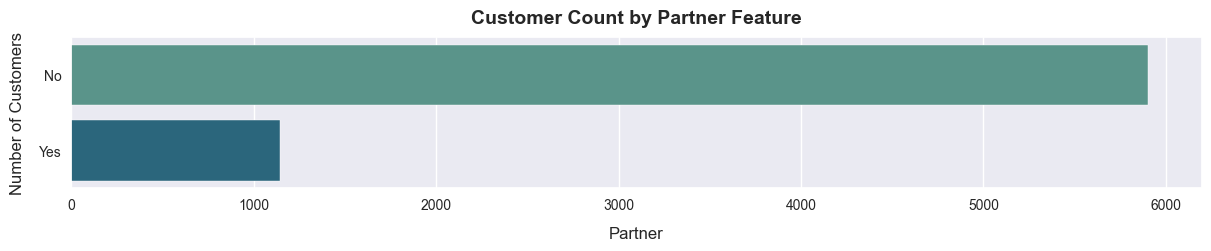

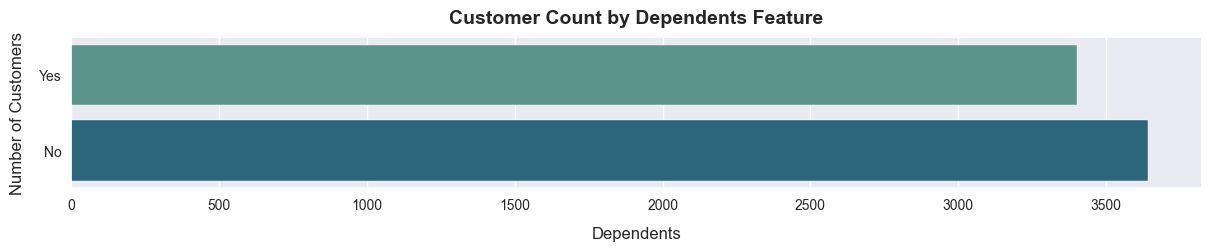

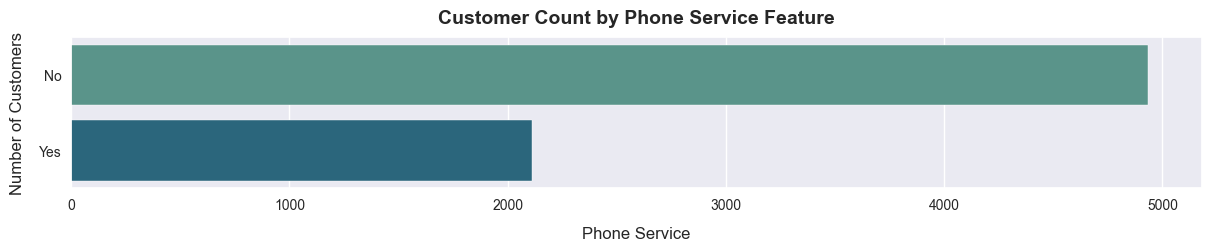

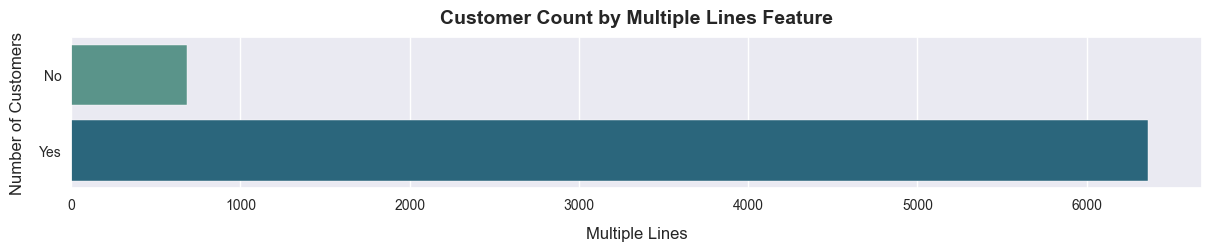

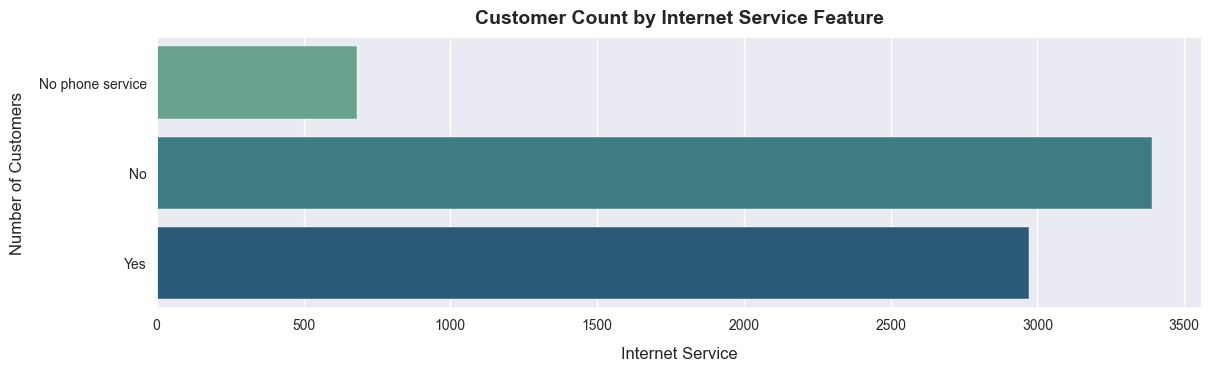

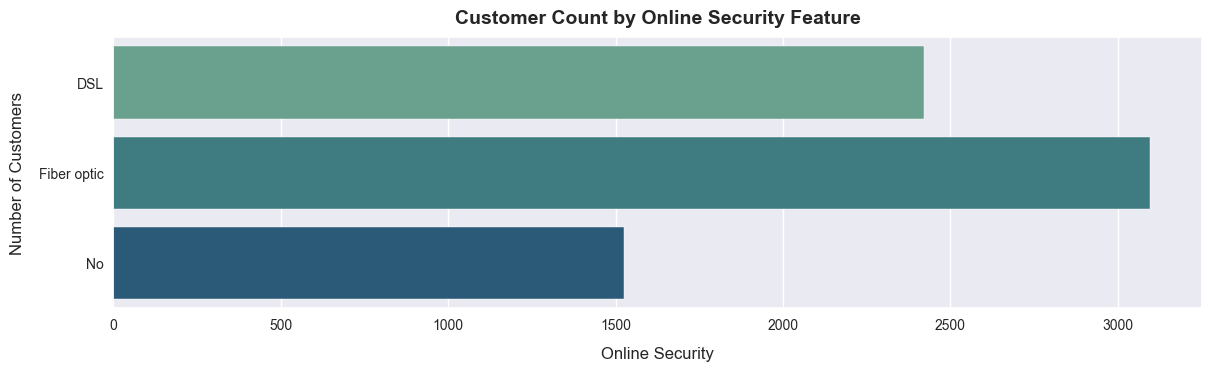

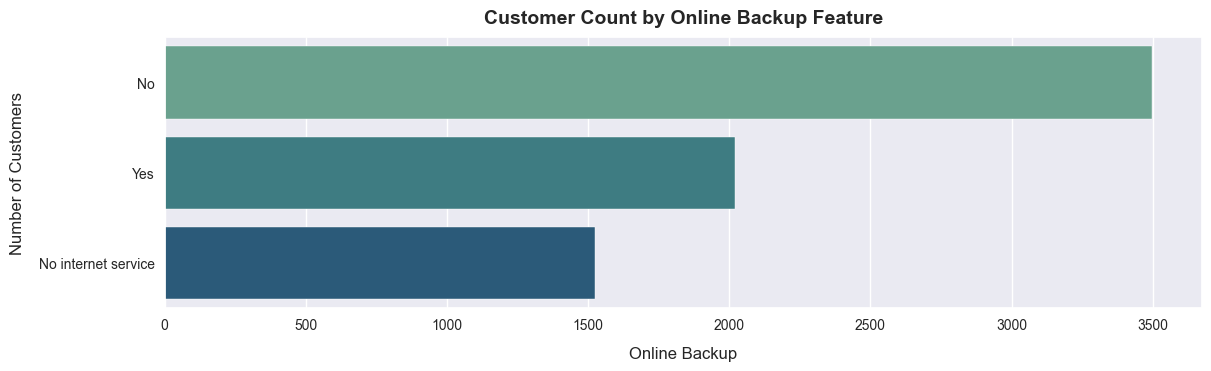

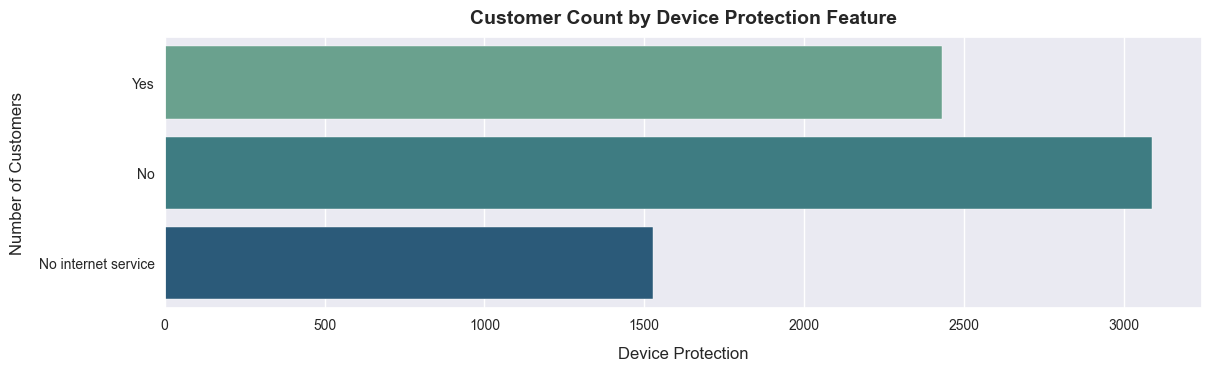

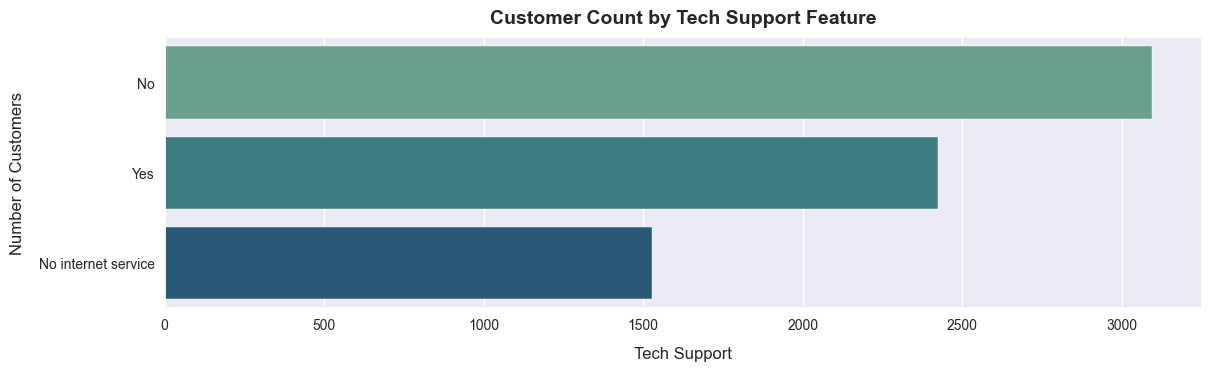

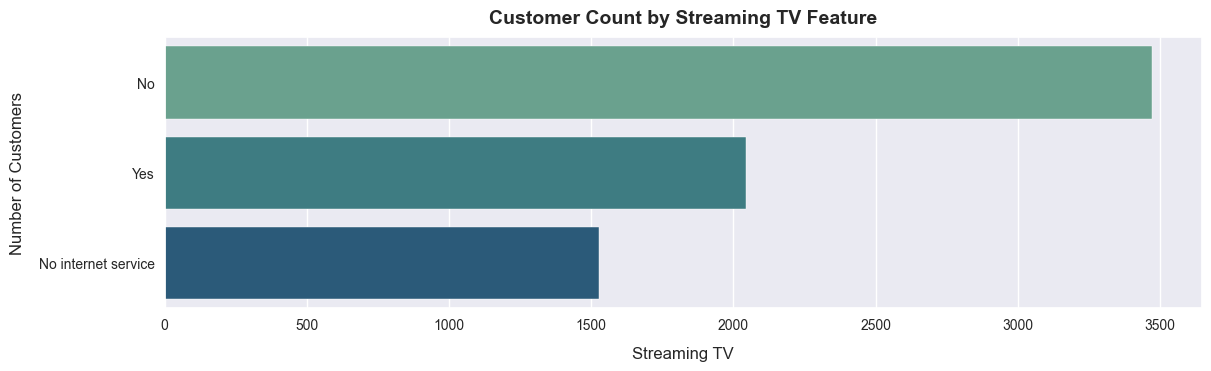

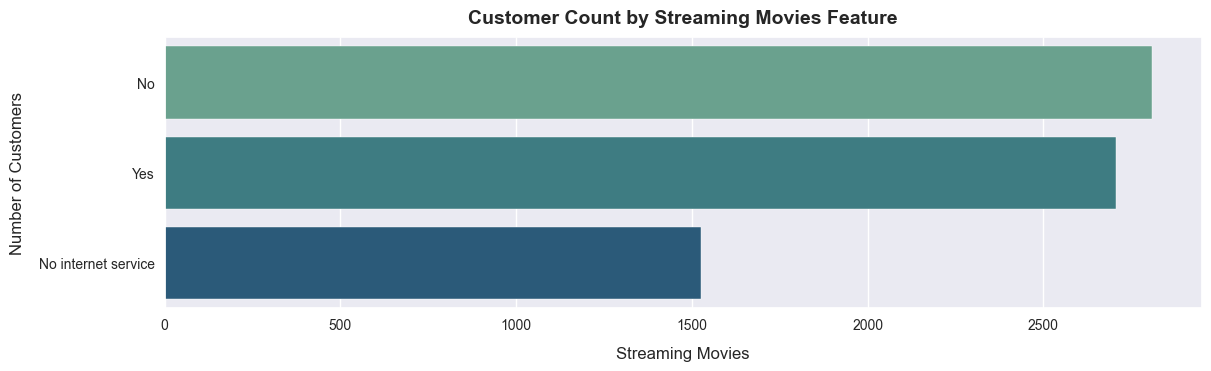

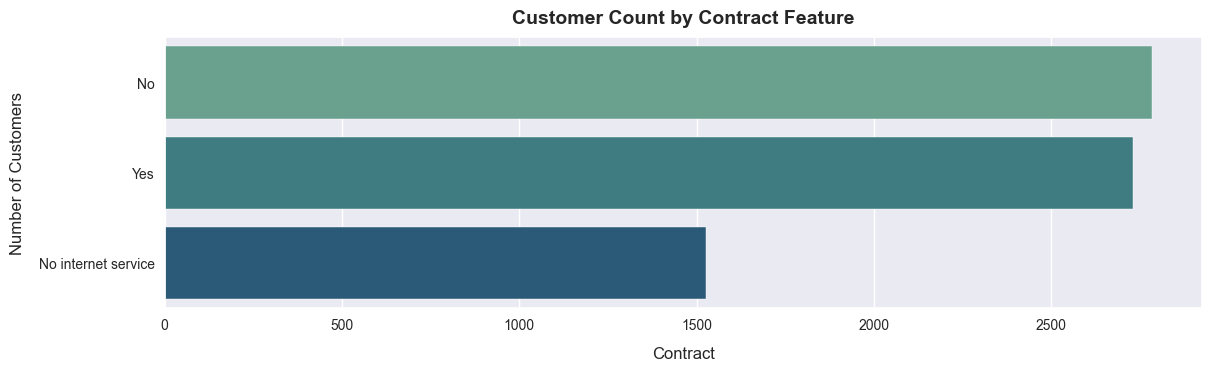

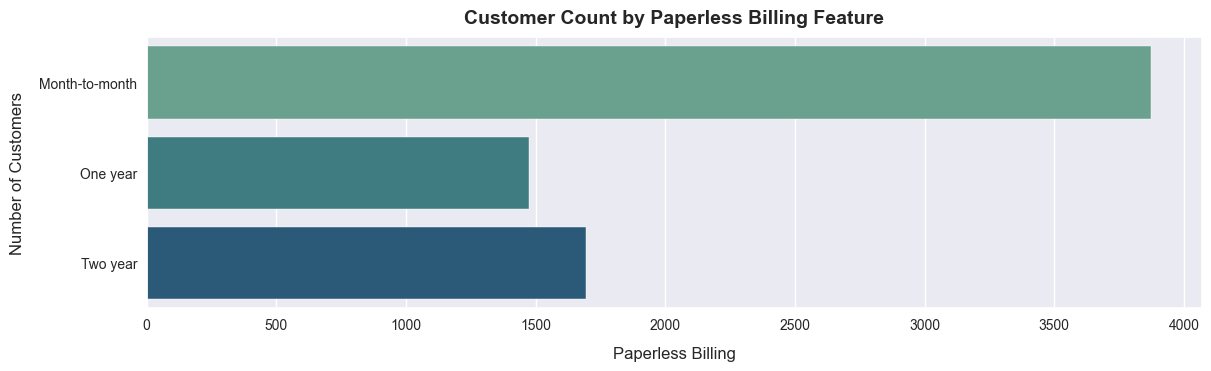

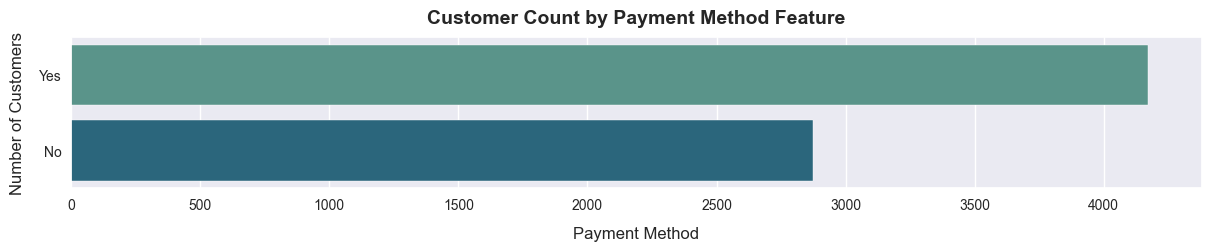

In [14]:
# Get features with categorical type
columns_to_visualize = df_prep.select_dtypes(include = 'object').columns.to_list()

# Set the name of each feature
name_of_columns = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 
                   'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 
                   'Payment Method']

for column, column_names in zip(columns_to_visualize, name_of_columns):
    if column != 'Churn':
        plt.figure(figsize = (12, 1.2 * df_prep[column].nunique()), constrained_layout = True) # Set the figure

        # Create the plot
        sns.countplot(data = df_prep, y = column, orient = 'h', palette = 'crest')

        # Set the title and labels
        plt.title(f'Customer Count by {column_names} Feature', pad = 10, fontsize = 14, fontweight = 'bold')

        plt.xlabel(column_names, labelpad = 10, fontsize = 12)
        plt.ylabel('Number of Customers', labelpad = 10, fontsize = 12)

        # Show the plot
        plt.show()

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
Berdasarkan hasil <b>analisis distribusi data</b>, ditemukan adanya <b>redundansi informasi</b> pada beberapa fitur, yaitu <code>MultipleLines</code>, <code>OnlineSecurity</code>, <code>OnlineBackup</code>, <code>DeviceProtection</code>, <code>TechSupport</code>, <code>StreamingTV</code>, dan <code>StreamingMovies</code>. Redundansi ini terjadi karena kategori <b>No internet service</b> pada enam fitur terakhir sebenarnya sudah diwakili oleh fitur <code>InternetService</code>, khususnya pada kategori <b>No</b>. Oleh karena itu, untuk <b>menyederhanakan representasi data</b> dan <b>menghindari duplikasi informasi</b>, kategori <b>No internet service</b> pada enam fitur tersebut akan disamakan menjadi <b>No</b>.
</p>

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
Hal serupa juga ditemukan pada fitur <code>MultipleLines</code>, di mana kategori <b>No phone service</b> sesungguhnya telah tercakup dalam kategori <b>No</b> pada fitur <code>PhoneService</code>. Untuk itu, akan dilakukan <b>penyederhanaan data</b> guna meningkatkan <b>konsistensi</b> dan <b>kebersihan data</b> secara keseluruhan.
</p>

In [15]:
columns_to_transform = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in columns_to_transform:
    if column == 'MultipleLines':
        df_prep[column] = df_prep[column].apply(lambda val: 'No' if val == 'No phone service' else val)       
    else: 
        df_prep[column] = df_prep[column].apply(lambda val: 'No' if val == 'No internet service' else val)

In [16]:
print('Show updated dataset:')
df_prep.head()

Show updated dataset:


,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Data Exploration - Insight Discovery**

In [17]:
df_visual = df_prep.copy()

## **Analysis of Customer Contract Preferences Based on Churn Risk**

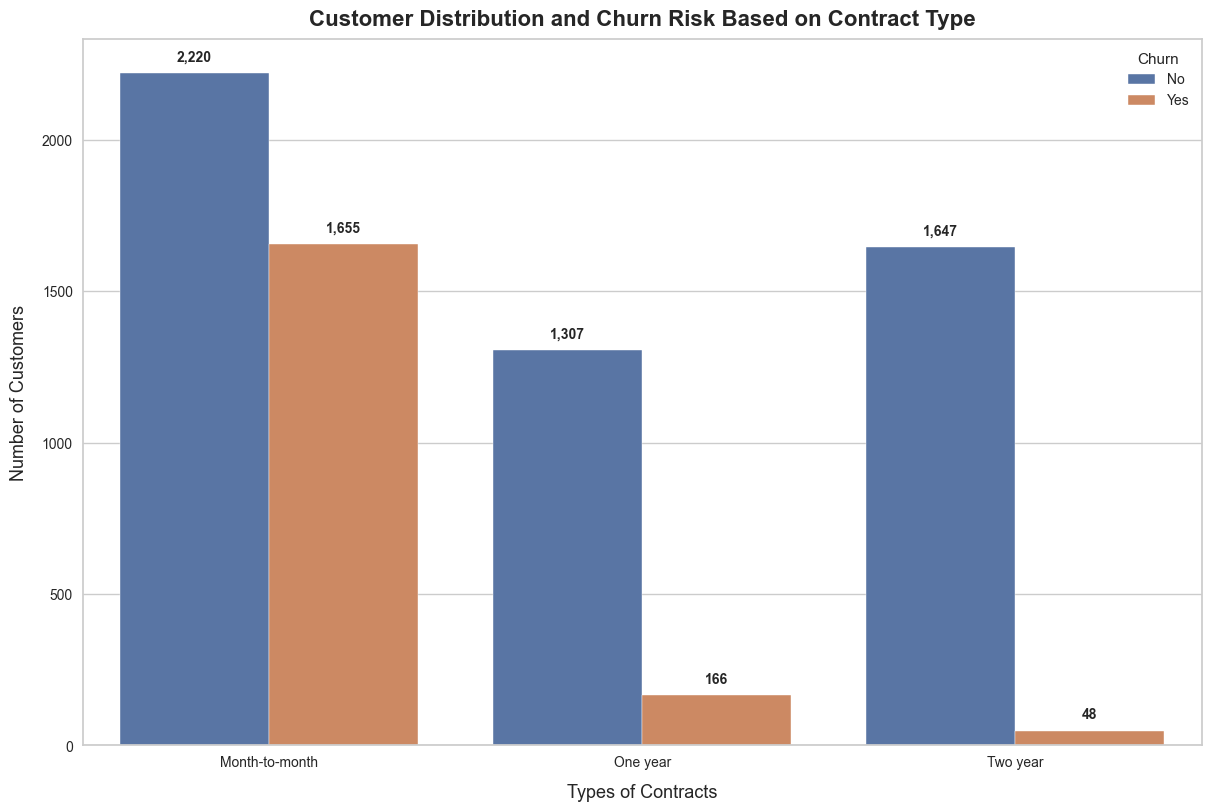

In [18]:
sns.set_style(style = 'whitegrid') # Set the seaborn style

plt.figure(figsize = (12,8), constrained_layout = True) # Set the figure size

# Create the plot
axs = sns.countplot(data = df_visual, x = 'Contract', hue = 'Churn', palette = 'deep')

# Add the annotation
for patch in axs.patches:
    height = patch.get_height()
    
    if height > 0:
        x = patch.get_x() + patch.get_width() / 2
        axs.text(x, height + 30, f'{int(height):,}',
                 ha = 'center', va = 'bottom',
                 fontsize = 10, fontweight = 'semibold')
        
# Add the title and labels
plt.title('Customer Distribution and Churn Risk Based on Contract Type', pad = 10, fontsize = 16, fontweight = 'bold')

plt.xlabel('Types of Contracts' , labelpad = 10, fontsize = 13)
plt.ylabel('Number of Customers', labelpad = 10, fontsize = 13)

# Set the legend
plt.legend(title = 'Churn', title_fontsize = 11, fontsize = 10, shadow = True)

# Show the plot
plt.show()

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
<b>Pelanggan dengan kontrak month-to-month</b> memiliki <b>tingkat churn yang lebih tinggi</b> dibandingkan dengan pelanggan yang terikat dalam kontrak panjang. <b>Jumlah pelanggan yang mengalami churn</b> pada kontrak month-to-month mencapai <b>1,655 orang</b>, sementara pada kontrak satu tahun hanya <b>166 orang</b> dan pada kontrak dua tahun hanya <b>48 orang</b>. Hal ini menunjukkan bahwa <b>pelanggan dengan kontrak jangka panjang</b> cenderung lebih <b>loyal</b> dan memiliki <b>kemungkinan lebih kecil untuk berhenti menggunakan layanan.</b>
</p>

## **Customer Segmentation Based on Monthly Charges Distribution**

In [19]:
# Compute average and quartile (Q1, Q2, and Q3) of Monthly Charges feature
monthlycharges_mean = df_visual['MonthlyCharges'].mean()

Q1 = df_visual['MonthlyCharges'].quantile(0.25)
Q2 = df_visual['MonthlyCharges'].quantile(0.50)
Q3 = df_visual['MonthlyCharges'].quantile(0.75)

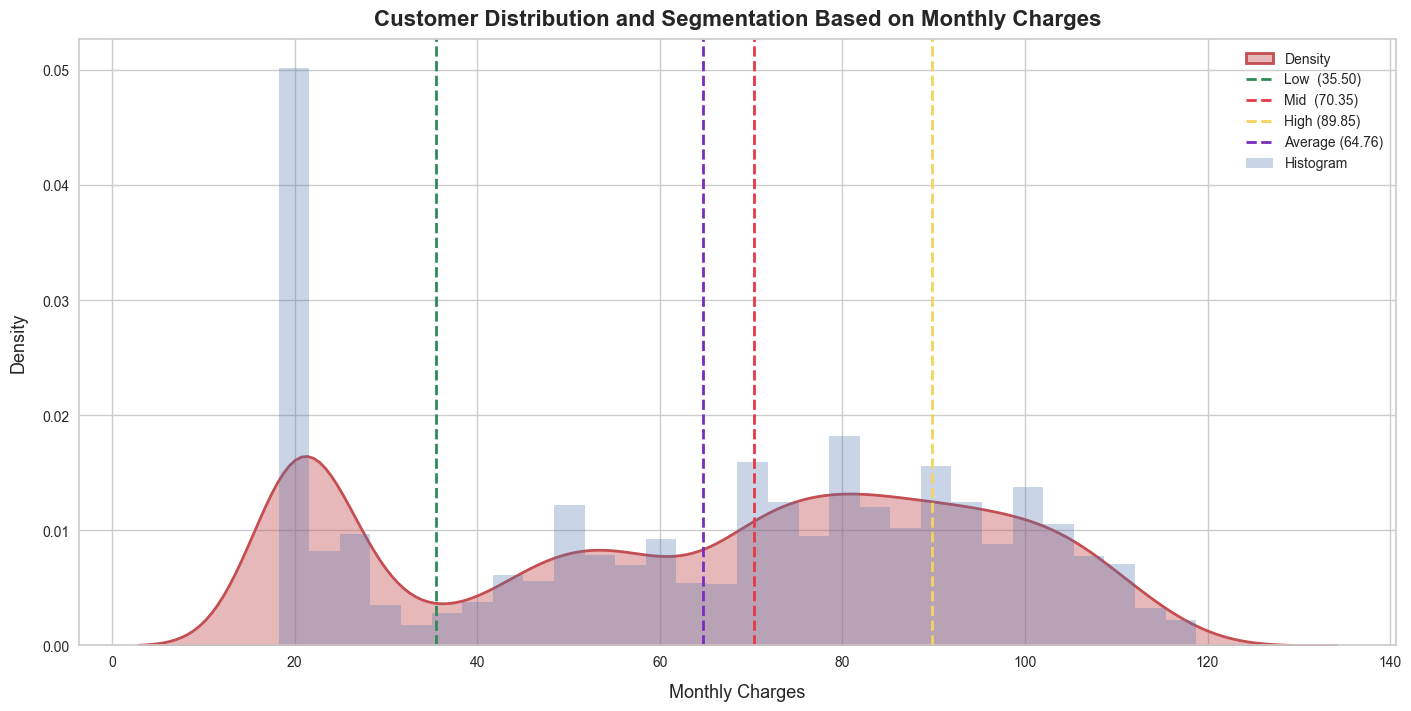

In [20]:
plt.figure(figsize = (14,7), constrained_layout = True) # Set the figure size

# Create the plot
sns.kdeplot(data = df_visual, x = 'MonthlyCharges', color = '#c44e52', fill = True, alpha = 0.4, linewidth = 2,
            label = 'Density')

sns.histplot(data = df_visual, x = 'MonthlyCharges', color = '#4c72b0', stat = 'density', bins = 30, alpha = 0.3, linewidth = 0,
             label = 'Histogram')

# Add the vertical line
plt.axvline(Q1, color = '#2E8B57', linestyle = '--', linewidth = 2, label = f'Low  ({Q1:.2f})')
plt.axvline(Q2, color = '#E63946', linestyle = '--', linewidth = 2, label = f'Mid  ({Q2:.2f})')
plt.axvline(Q3, color = '#F4D35E', linestyle = '--', linewidth = 2, label = f'High ({Q3:.2f})')

plt.axvline(monthlycharges_mean, color = '#7B2CBF', linestyle = '--', linewidth = 2, label = f'Average ({monthlycharges_mean:.2f})')

# Add the title and labels
plt.title('Customer Distribution and Segmentation Based on Monthly Charges', pad = 10, fontsize = 16, fontweight = 'bold')

plt.xlabel('Monthly Charges', labelpad = 10, fontsize = 13)
plt.ylabel('Density'        , labelpad = 10, fontsize = 13)

# Set the legend
plt.legend(title_fontsize = 11, fontsize = 10, shadow = True)

# Show the plot
plt.show()

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
Distribusi menunjukkan bahwa <b>sebagian besar pelanggan</b> terkelompok pada <b>segmen biaya rendah hingga menengah</b>, dengan <b>puncak kepadatan</b> berada di kisaran <b>20 hingga 30 per bulan</b>. Hal ini mengindikasikan bahwa <b>basis pelanggan terbesar</b> berasal dari segmen <b>biaya terendah</b>. Di sisi lain, segmen <b>biaya tinggi</b> memiliki distribusi yang lebih <b>tersebar</b> dan kepadatan yang lebih <b>rendah</b>, namun segmen ini dapat menjadi <b>target potensial</b> untuk <b>layanan premium</b> dengan <b>nilai tambah</b> yang lebih tinggi.
</p>

## **Evaluation of Efficiency and Churn Risk Based on Payment Method**

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
Pada analisis ini, akan dilakukan <b>penyederhanaan nilai</b> pada fitur <code>PaymentMethod</code> dengan mengelompokkan metode pembayaran menjadi dua kategori utama, yaitu <b>Automatic</b> dan <b>Non-Automatic</b>. Penyederhanaan ini akan direpresentasikan melalui pembuatan fitur baru yang lebih ringkas namun tetap informatif.
</p>

In [21]:
df_visual['IsAutomaticPayment'] = df_visual['PaymentMethod'].apply(lambda val: ('Automatic' if val == 'Bank transfer (automatic)' or
                                                                                val == 'Credit card (automatic)' else 'Non-Automatic'))

print('Show the data:')
df_visual[['PaymentMethod', 'IsAutomaticPayment']].sample(5)

Show the data:


,PaymentMethod,IsAutomaticPayment
2305,Bank transfer (automatic),Automatic
1266,Electronic check,Non-Automatic
5398,Mailed check,Non-Automatic
1504,Electronic check,Non-Automatic
3368,Electronic check,Non-Automatic


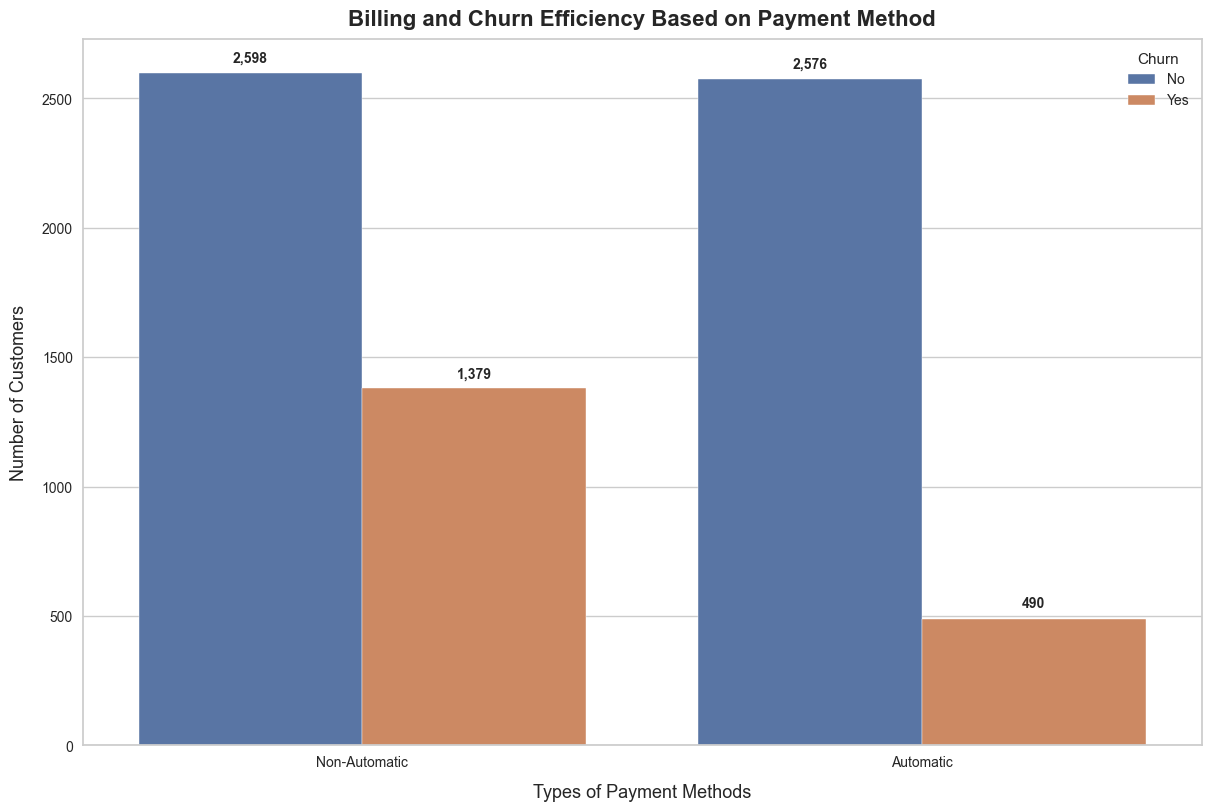

In [22]:
plt.figure(figsize = (12,8), constrained_layout = True) # Set the figure size

# Create the plot
axs = sns.countplot(data = df_visual, x = 'IsAutomaticPayment', hue = 'Churn', palette = 'deep')

# Add the annotation
for patch in axs.patches:
    height = patch.get_height()

    if height > 0:
        x = patch.get_x() + patch.get_width() / 2
        axs.text(x, height + 30, f'{int(height):,}',
                 ha = 'center', va = 'bottom',
                 fontsize = 10, fontweight = 'semibold')
        
# Add the title and labels
plt.title('Billing and Churn Efficiency Based on Payment Method', pad = 10, fontsize = 16, fontweight = 'bold')

plt.xlabel('Types of Payment Methods', labelpad = 10, fontsize = 13)
plt.ylabel('Number of Customers'     , labelpad = 10, fontsize = 13)

# Set the legend
plt.legend(title = 'Churn', title_fontsize = 11, fontsize = 10, shadow = True)

# Show the plot
plt.show()

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
Tingkat <b>churn</b> pada pelanggan dengan <b>pembayaran non-otomatis</b> jauh lebih tinggi dibandingkan dengan pelanggan yang menggunakan <b>pembayaran otomatis</b>. Hal ini mengindikasikan bahwa <b>pembayaran otomatis</b> tidak hanya meningkatkan <b>efisiensi penagihan</b>, tetapi juga berperan dalam <b>mengurangi risiko churn</b>.
</p>

## **Customer Loyalty Stage Segmentation Based on Length of Subscription**

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
Pada analisis ini, nilai pada fitur <code>Tenure</code> akan dikelompokkan ke dalam empat fase berdasarkan <b>lama masa berlangganan pelanggan</b>, yang merepresentasikan <b>tahapan durasi pembayaran</b> tertentu.
</p>

In [23]:
def tenure_phase(month):
    if month >= 0 and month < 4:
        return 'Onboarding/Activation Phase'
    elif month >= 4 and month < 13:
        return 'Evaluation/Stabilization Phase'
    elif month >= 13 and month < 25:
        return 'Maturity/Commitment Phase'
    else:
        return 'Advocacy/Long-Term Phase'
    
# Apply the function
df_visual['SubscriptionPhase'] = df_visual['Tenure'].apply(lambda val: tenure_phase(val))

print('Show the data:')
df_visual[['Tenure', 'SubscriptionPhase']].sample(5)

Show the data:


,Tenure,SubscriptionPhase
1802,7,Evaluation/Stabilization Phase
4169,15,Maturity/Commitment Phase
3226,7,Evaluation/Stabilization Phase
1340,0,Onboarding/Activation Phase
3754,1,Onboarding/Activation Phase


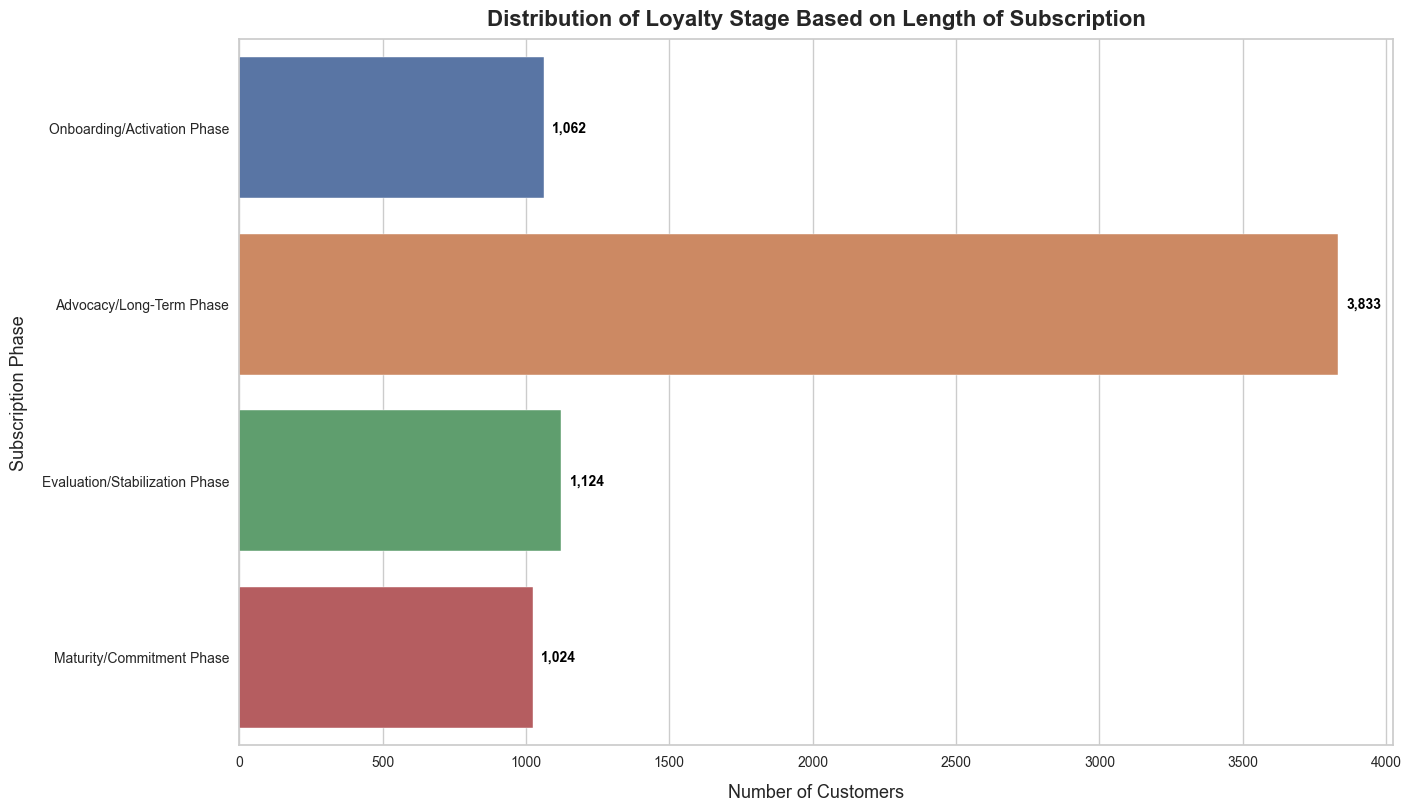

In [24]:
plt.figure(figsize = (14,8) , constrained_layout = True) # Set the figure size

# Create the plot
axs = sns.countplot(data = df_visual, y = 'SubscriptionPhase', orient = 'h', palette = 'deep')

# Add the annotation
for patch in axs.patches:
    axs.text(patch.get_width() + 90, patch.get_y() + patch.get_height() / 2, 
             f'{patch.get_width():,.0f}', 
             ha = 'center', va = 'center',
             fontsize = 10, fontweight = 'semibold',
             color = 'black')

# Add the title and labels
plt.title('Distribution of Loyalty Stage Based on Length of Subscription', pad = 10, fontsize = 16, fontweight = 'bold')

plt.xlabel('Number of Customers', labelpad = 10, fontsize = 13)
plt.ylabel('Subscription Phase' , labelpad = 10, fontsize = 13)

# Show the plot
plt.show()

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
Mayoritas pelanggan berada pada <b>tahap Advocacy/Long-Term Phase</b>, dengan <b>3,833 pelanggan</b>, yang menunjukkan <b>loyalitas jangka panjang</b>. Sebagai pelanggan yang sudah lama berlangganan, mereka lebih stabil dan dapat memberikan <b>pertumbuhan melalui rekomendasi</b>. Sementara itu, pelanggan di <b>Tahap Evaluation/Stabilization</b> (1,124 pelanggan) dan <b>Tahap Maturity/Commitment</b> (1,024 pelanggan) menunjukkan loyalitas yang lebih rendah, dengan kebutuhan akan perhatian lebih untuk mempertahankan kesetiaan mereka. Pelanggan di <b>Tahap Onboarding/Activation</b> (1,062 pelanggan) adalah pelanggan baru yang masih dalam tahap pengenalan, yang memerlukan strategi yang tepat untuk mengurangi risiko churn dan mengarahkan mereka ke tahap loyalitas jangka panjang.
</p>

# **Data Preparation and Exploration**

In [25]:
df_cleaned = df_prep.copy()

In [26]:
# Drop unnecessary features
df_prep = df_prep.drop(['CustomerID', 'Churn'], axis = 1)

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
Langkah selanjutnya dalam proses <b>pemrosesan data</b> adalah melakukan <b>encoding</b> pada fitur-fitur bertipe <b>kategorik</b>, agar dapat diolah oleh <b>model yang berbasis numerik</b>. Dalam proses ini, akan digunakan dua teknik utama, yaitu <code>LabelEncoder</code> dan <code>One-Hot Encoding</code>. <code>LabelEncoder</code> akan diterapkan pada <b>fitur dengan dua kategori (biner)</b>. Sementara itu, untuk <b>fitur dengan lebih dari dua kategori</b>, akan digunakan <code>One-Hot Encoding</code>.
</p>

In [27]:
# Get features with categorical type
columns_to_transform = df_prep.select_dtypes(include = 'object').columns.to_list()

# Perform data transformation using LabelEncoder and One-Hot Encoding
labelers = {}
columns_non_binary = []

for column in columns_to_transform:
    if len(df_prep[column].unique()) == 2:
        labelers[column] = LabelEncoder()

        df_prep[column] = labelers[column].fit_transform(df_prep[column])
    else:
        columns_non_binary.append(column)

df_prep = pd.get_dummies(df_prep, columns = columns_non_binary, dtype = 'int')

In [28]:
print('Show updated dataset:')
df_prep.head()

Show updated dataset:


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
Setelah melakukan <b>data encoding</b> pada <b>fitur-fitur kategorik</b>, langkah berikutnya adalah melakukan <b>pengecekan korelasi</b> antar seluruh <b>fitur dalam dataset</b>. Proses ini bertujuan untuk <b>mengidentifikasi fitur-fitur yang memiliki hubungan sangat kuat satu sama lain</b>, karena <b>korelasi yang tinggi</b> dapat menyebabkan <b>redundansi informasi</b> dan berdampak pada <b>kinerja model</b>.
</p>

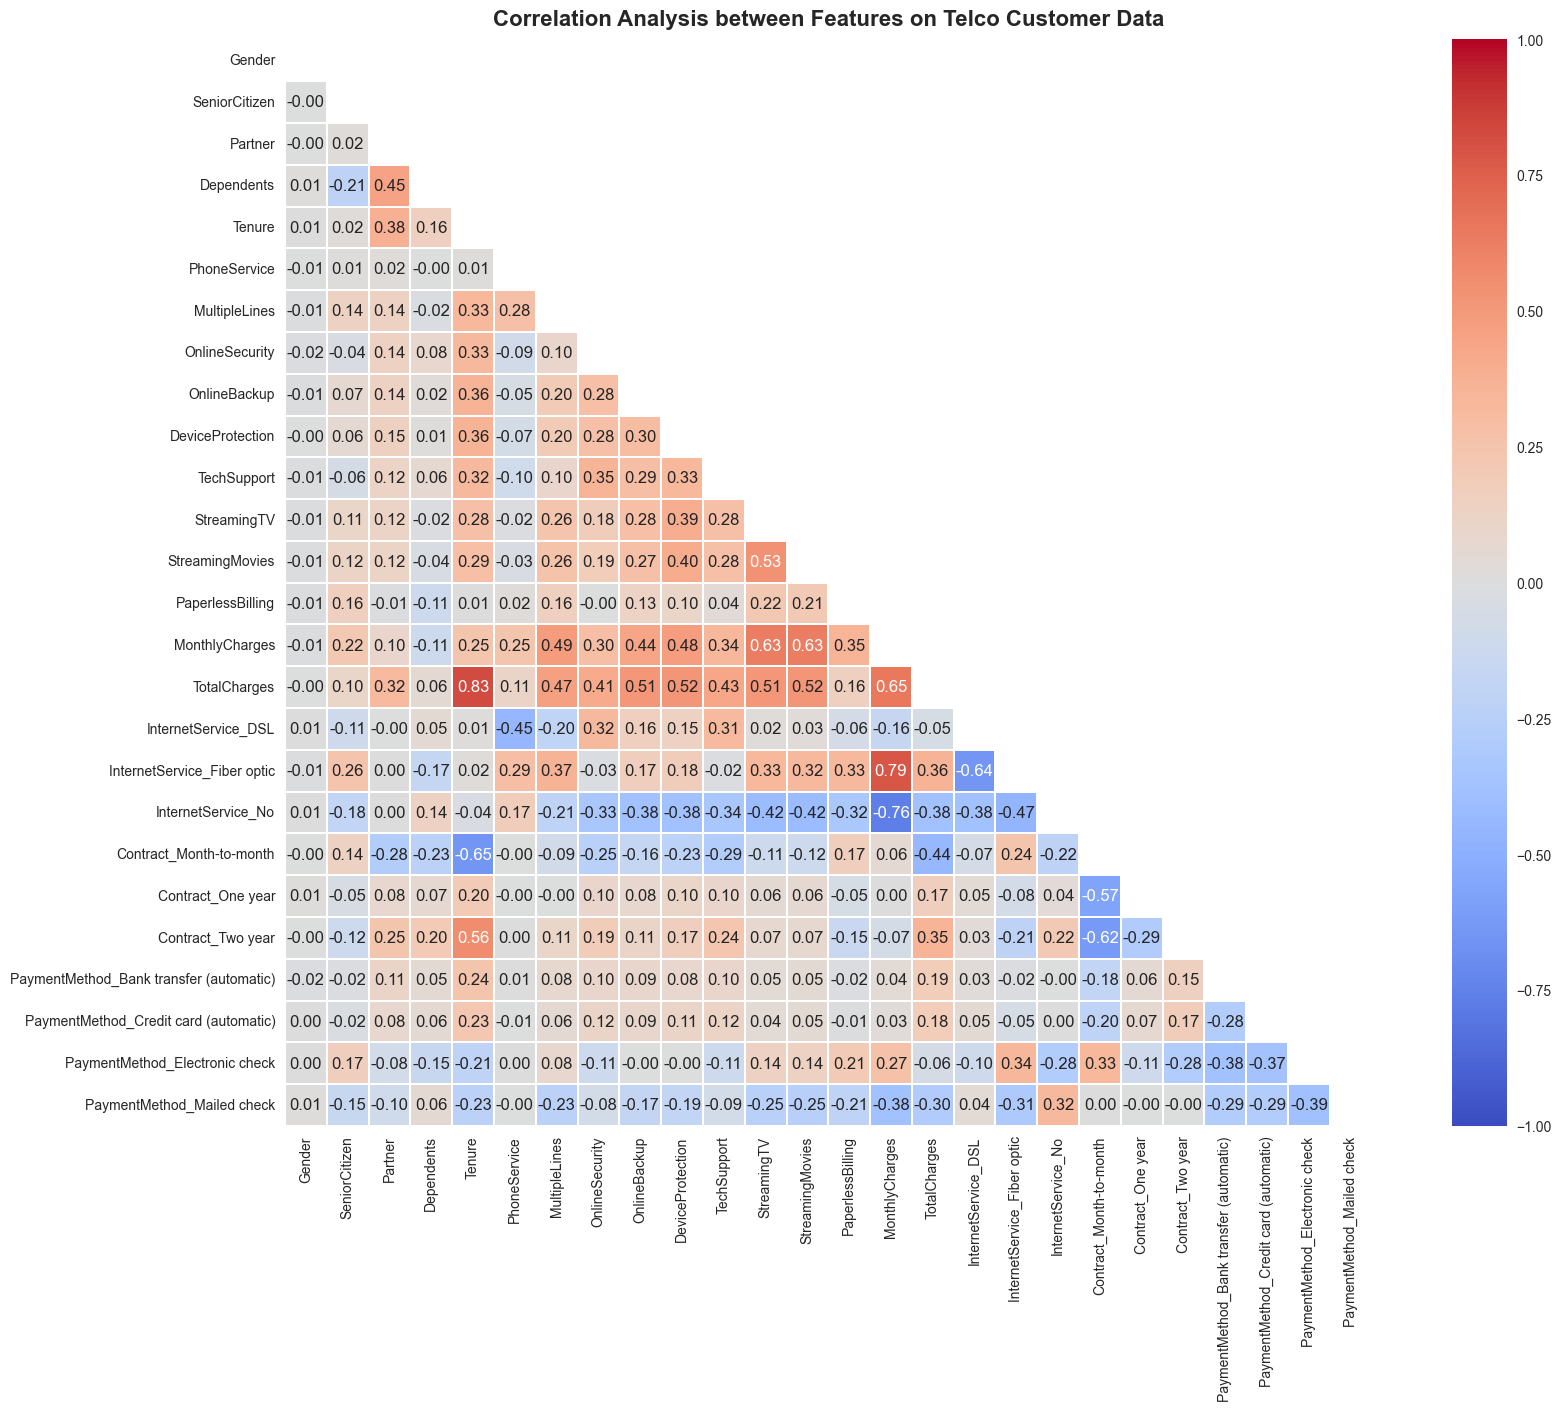

In [29]:
sns.set_style(style = 'white') # Set seaborn style

# Compute and show the correlation value of each feature
df_corr = df_prep.corr()

plt.figure(figsize = (18,14), constrained_layout = True)

mask = np.triu(np.ones_like(df_corr, dtype = bool))
sns.heatmap(data = df_corr, vmin = -1, vmax = 1, cmap = 'coolwarm', annot = True, fmt = '.2f', linewidths = 0.3, square = True, mask = mask)

plt.title('Correlation Analysis between Features on Telco Customer Data', pad = 10, fontsize = 16, fontweight = 'bold')

plt.show()


<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
Berdasarkan hasil <b>analisis korelasi</b>, ditemukan bahwa terdapat beberapa fitur yang memiliki <b>nilai korelasi lebih dari 0.70</b>, yang mengindikasikan adanya <b>multikolinearitas</b> di antara fitur-fitur tersebut. Kondisi ini dapat memengaruhi kualitas hasil <b>clustering</b>, khususnya pada algoritma <b>K-Means</b>. Oleh karena itu, akan diterapkan dua pendekatan berbeda untuk mengatasi dampak dari multikolinearitas. <b>Pendekatan pertama</b> dilakukan dengan cara <b>menghapus fitur-fitur</b> yang memiliki nilai korelasi lebih besar dari <b>0.70</b>, guna menyederhanakan struktur data tanpa kehilangan informasi penting secara signifikan. Sementara itu, <b>pendekatan kedua</b> akan menggunakan <b>Principal Component Analysis (PCA)</b> untuk mereduksi dimensi dan menyajikan data dalam bentuk <b>komponen utama</b> yang saling bebas secara statistik.
</p>

# **Data Modelling**

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
Pada tahap <b>pemodelan</b>, akan digunakan algoritma <b>K-Means</b> baik <b>tanpa</b> maupun <b>dengan penerapan Principal Component Analysis (PCA)</b> terlebih dahulu. Pendekatan ini bertujuan untuk membandingkan <b>kinerja</b> dan <b>efektivitas klasterisasi</b> saat data direduksi dimensinya. Untuk menentukan <b>jumlah cluster yang optimal</b>, akan digunakan dua <b>metrik evaluasi</b>, yaitu <b>Elbow Method</b> dan <b>Silhouette Score</b>.
</p>

## **K-Means Clustering w/o Principal Component Analysis**

In [30]:
df_without_pca = df_prep.copy()

In [31]:
# Drop features with a correlation value greater than 0.70
df_corr = df_without_pca.corr().abs()

mask = np.triu(np.ones(df_corr.shape), k = 1).astype(np.bool)
upper = df_corr.where(mask)

columns_to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

df_without_pca = df_without_pca.drop(columns_to_drop, axis = 1)

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
Setelah menghapus fitur-fitur yang memiliki <b>nilai korelasi</b> lebih dari <b>0.70</b>, langkah terakhir dalam proses <b>pemrosesan data</b> pada pendekatan ini adalah melakukan <b>standarisasi</b> terhadap seluruh fitur yang bertipe <b>numerik</b>. Proses ini menggunakan <code>StandardScaler</code>, yang berfungsi untuk mengubah distribusi data sehingga memiliki <b>rata-rata (mean) sebesar 0</b> dan <b>simpangan baku (standard deviation) sebesar 1</b>.
</p>

In [32]:
SCALER = StandardScaler()

# Perform standardization on each feature
df_without_pca_scaled = SCALER.fit_transform(df_without_pca)
df_without_pca_scaled = pd.DataFrame(df_without_pca_scaled, columns = df_without_pca.columns)

In [33]:
print('Show the latest dataset:')
df_without_pca_scaled.head()

Show the latest dataset:


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,InternetService_DSL,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,-0.854176,-0.633933,1.378241,-0.723968,...,0.829798,-1.160323,1.381712,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.854176,1.577454,-0.725563,1.381277,...,-1.205113,-0.259629,1.381712,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,1.577454,1.378241,-0.723968,...,0.829798,-0.362660,1.381712,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,-0.854176,1.577454,-0.725563,1.381277,...,-1.205113,-0.746535,1.381712,-1.105970,1.944582,-0.562975,1.887201,-0.525047,-0.711026,-0.544807
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,-0.633933,-0.725563,-0.723968,...,0.829798,0.197365,-0.723740,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807


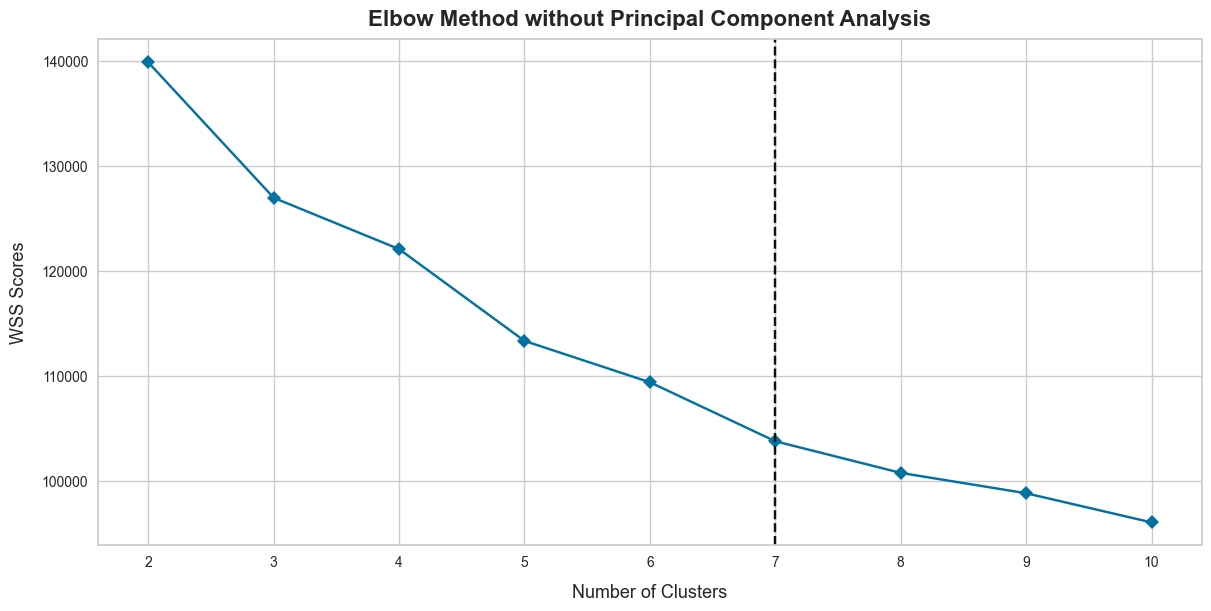

In [34]:
# Perform K-Means Clustering with Elbow Method
kmeans_model_without_pca = KMeans(random_state = 42)

sns.set_style(style = 'whitegrid')

fig, axs = plt.subplots(figsize = (12,6), constrained_layout = True)

elbow_visualizer = KElbowVisualizer(kmeans_model_without_pca, k = (2,11), timings = False, ax = axs)
elbow_visualizer.fit(df_without_pca_scaled)

axs.set_title('Elbow Method without Principal Component Analysis', pad = 10, fontsize = 16, fontweight = 'bold')

axs.set_xlabel('Number of Clusters', labelpad = 10, fontsize = 13)
axs.set_ylabel('WSS Scores'        , labelpad = 10, fontsize = 13)

plt.show()

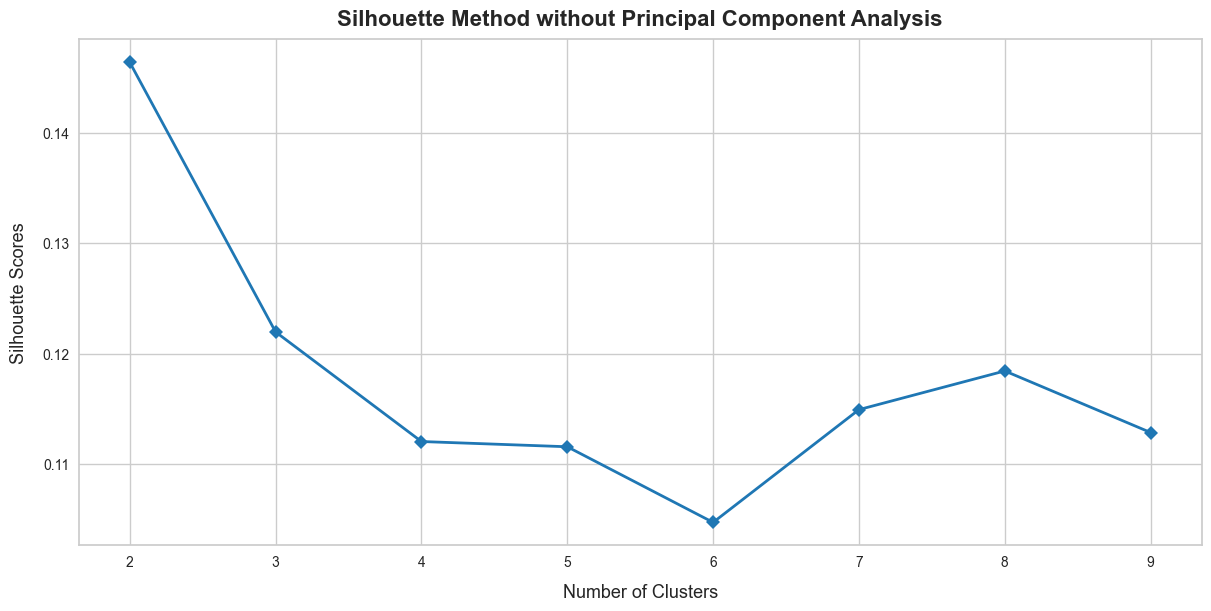

In [35]:
# Perform K-Means Clustering with Silhouette Method
silhouette = []

for k in range(2,10):
    kmeans_model_without_pca = KMeans(n_clusters = k, random_state = 42).fit(df_without_pca_scaled)

    silhouette.append(silhouette_score(df_without_pca_scaled, kmeans_model_without_pca.labels_))

df_silhouette_without_pca = pd.DataFrame({
    'Cluster' : list(range(2,10)),
    'Score'   : silhouette
})

plt.figure(figsize = (12,6), constrained_layout = True)

plt.plot(df_silhouette_without_pca['Cluster'], df_silhouette_without_pca['Score'], color = '#1f77b4', marker = 'D', linewidth = 2)

plt.title('Silhouette Method without Principal Component Analysis', pad = 10, fontsize = 16, fontweight = 'bold')

plt.xlabel('Number of Clusters', labelpad = 10, fontsize = 13)
plt.ylabel('Silhouette Scores' , labelpad = 10, fontsize = 13)

plt.show()

## **K-Means Clustering with Principal Component Analysis**

In [36]:
df_with_pca = df_prep.copy()

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
Berbeda dengan <b>pendekatan sebelumnya</b>, pada pendekatan ini langkah pertama yang dilakukan adalah <b>standarisasi data</b>, guna memastikan bahwa seluruh fitur berada dalam <b>skala yang konsisten dan sebanding</b>. Setelah proses tersebut, data akan ditransformasi menggunakan <b>Principal Component Analysis (PCA)</b> untuk mereduksi dimensi dan menyoroti <b>komponen utama</b> yang paling mewakili <b>variabilitas data</b>.
</p>

In [37]:
SCALER = StandardScaler()

# Perform standardization on each feature
df_with_pca_scaled = SCALER.fit_transform(df_with_pca)
df_with_pca_scaled = pd.DataFrame(df_with_pca_scaled, columns = df_with_pca.columns)

In [38]:
print('Show updated dataset:')
df_with_pca_scaled.head()

Show updated dataset:


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,-0.854176,-0.633933,1.378241,-0.723968,...,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.854176,1.577454,-0.725563,1.381277,...,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,1.577454,1.378241,-0.723968,...,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,-0.854176,1.577454,-0.725563,1.381277,...,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,1.887201,-0.525047,-0.711026,-0.544807
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,-0.633933,-0.725563,-0.723968,...,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807


<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
Setelah data melalui proses <b>standarisasi</b>, langkah terakhir dalam <b>pemrosesan data</b> pada pendekatan ini adalah melakukan <b>transformasi data</b> menggunakan <b>Principal Component Analysis (PCA)</b>. Pada tahap ini, akan ditentukan jumlah <b>komponen utama</b> yang akan dibentuk berdasarkan nilai <b>variansi kumulatif</b>, dengan tujuan untuk mempertahankan sebanyak mungkin informasi dari data asli dalam <b>dimensi yang lebih rendah</b>.
</p>

In [39]:
# Perform Principal Component Analysis (PCA) Method
COMP_ANALYSIS = PCA(random_state = 42)

comp_analysis_model = COMP_ANALYSIS.fit(df_with_pca_scaled)
df_explained_var = pd.DataFrame({
    'Component'      : range(1, len(comp_analysis_model.explained_variance_ratio_) + 1),
    'Variance'       : comp_analysis_model.explained_variance_ratio_,
    'Cumulative Var' : comp_analysis_model.explained_variance_ratio_.cumsum()
})

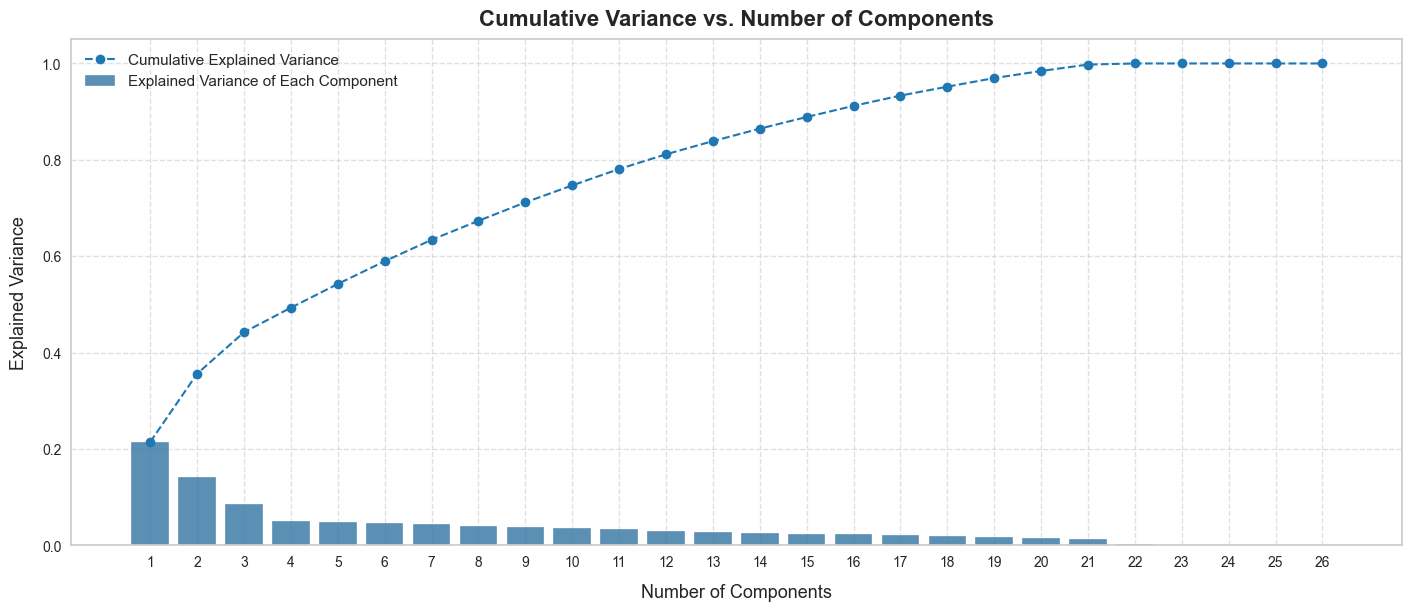

In [40]:
plt.figure(figsize = (14,6), constrained_layout = True)

sns.barplot(x = range(1, len(df_explained_var['Variance']) + 1), y = df_explained_var['Variance'], color = '#1f77b4', alpha = 0.8, 
            label = 'Explained Variance of Each Component')

plt.plot(range(0, len(df_explained_var['Cumulative Var'])), df_explained_var['Cumulative Var'], color = '#1f77b4', marker = 'o',
         linestyle = '--', linewidth = 1.5, label = 'Cumulative Explained Variance')

plt.title('Cumulative Variance vs. Number of Components', pad = 10, fontsize = 16, fontweight = 'bold')

plt.xlabel('Number of Components', labelpad = 10, fontsize = 13)
plt.ylabel('Explained Variance'  , labelpad = 10, fontsize = 13)

plt.grid(linestyle = '--', alpha = 0.6)

plt.legend(fontsize = 11)

plt.show()

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
Berdasarkan hasil yang diperoleh, akan dipilih <b>komponen utama</b> yang memiliki <b>variansi kumulatif lebih dari 0.80</b>. <b>Ambang batas</b> ini dipilih karena komponen-komponen tersebut dinilai sudah cukup untuk <b>mewakili sebagian besar informasi</b> dari <b>data asli</b>, tanpa menambah <b>dimensi yang tidak perlu</b>. Dengan demikian, sebanyak <b>12 komponen utama</b> akan digunakan untuk <b>tahap analisis berikutnya</b>, guna menjaga keseimbangan antara <b>kompleksitas model</b> dan <b>kualitas representasi data</b>.
</p>

In [41]:
COMP_ANALYSIS = PCA(n_components = 12, random_state = 42)

df_comp_analysis = COMP_ANALYSIS.fit_transform(df_with_pca_scaled)
df_comp_analysis = pd.DataFrame(df_comp_analysis, columns = [f'PC {i+1}' for i in range(COMP_ANALYSIS.n_components_)])

print('Show the latest dataset:')
df_comp_analysis.head()

Show the latest dataset:


,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12
0,-1.935637,0.822839,3.065506,-0.899621,-0.254368,1.334606,-1.821160,-0.025080,-1.179195,0.451961,0.226023,1.244334
1,-1.018356,-1.656129,1.593321,2.542482,-0.166143,-0.694160,1.609293,0.653400,0.774242,0.637907,0.845911,-0.681429
2,-1.918328,0.354476,2.264662,-0.046830,0.070857,-0.763809,1.790579,-0.599442,1.392388,1.285701,0.475182,1.441666
3,-0.058129,-2.551981,3.251940,1.745986,-1.855180,-1.325686,-1.205068,0.498667,0.932499,-0.598202,0.558818,-1.010158
4,-1.687012,2.917941,-0.106923,-0.166795,0.057416,0.030698,-0.184995,-0.561443,-0.916980,-0.851131,0.660454,0.599082


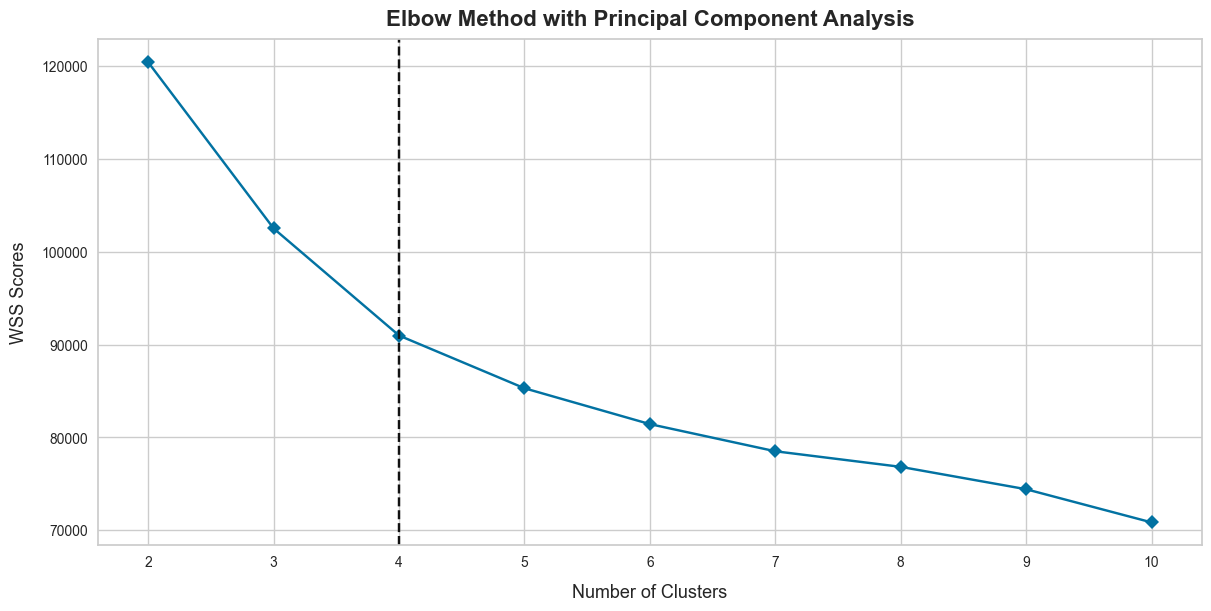

In [42]:
# Perform K-Means Clustering with Elbow Method
kmeans_model_with_pca = KMeans(random_state = 42)

fig, axs = plt.subplots(figsize = (12,6), constrained_layout = True)

elbow_visualizer = KElbowVisualizer(kmeans_model_with_pca, k = (2,11), timings = False, ax = axs)
elbow_visualizer.fit(df_comp_analysis)

axs.set_title('Elbow Method with Principal Component Analysis', pad = 10, fontsize = 16, fontweight = 'bold')

axs.set_xlabel('Number of Clusters', labelpad = 10, fontsize = 13)
axs.set_ylabel('WSS Scores'        , labelpad = 10, fontsize = 13)

plt.show()

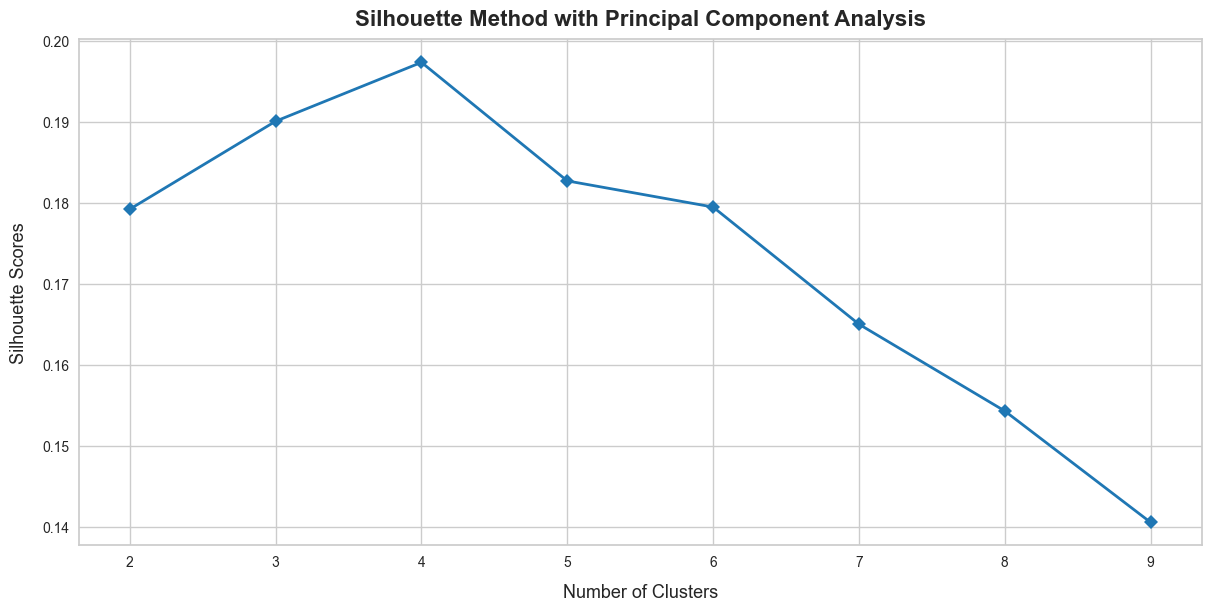

In [43]:
# Perform K-Means Clustering with Silhouette Method
silhouette = []

for k in range(2,10):
    kmeans_model_with_pca = KMeans(n_clusters = k, random_state = 42).fit(df_comp_analysis)

    silhouette.append(silhouette_score(df_comp_analysis, kmeans_model_with_pca.labels_))

df_silhouette_with_pca = pd.DataFrame({
    'Cluster' : list(range(2,10)),
    'Score'   : silhouette
})

plt.figure(figsize = (12,6), constrained_layout = True)

plt.plot(df_silhouette_with_pca['Cluster'], df_silhouette_with_pca['Score'], color = '#1f77b4', marker = 'D', linewidth = 2)

plt.title('Silhouette Method with Principal Component Analysis', pad = 10, fontsize = 16, fontweight = 'bold')

plt.xlabel('Number of Clusters', labelpad = 10, fontsize = 13)
plt.ylabel('Silhouette Scores' , labelpad = 10, fontsize = 13)

plt.show()

# **Final Model**

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
Berdasarkan hasil analisis yang telah dilakukan, dapat disimpulkan bahwa <b>model K-Means dengan Principal Component Analysis (PCA)</b> memberikan <b>hasil yang lebih optimal</b> dibandingkan dengan model tanpa menggunakan PCA. Hal ini terlihat dari <b>nilai Silhouette Score yang lebih tinggi</b> dan <b>titik Elbow yang lebih jelas</b> pada model dengan PCA, yang menunjukkan pemisahan kluster yang lebih baik dan efisien. Selain itu, dari kedua metode evaluasi yang digunakan, diperoleh bahwa <b>jumlah kluster terbaik adalah sebanyak 4 kluster</b>, yang memberikan keseimbangan antara kompleksitas model dan kualitas segmentasi data.
</p>

In [44]:
# Perform K-Means Clustering with optimal k
KMEANS = KMeans(n_clusters = 4, random_state = 42)
kmeans_model = KMEANS.fit(df_comp_analysis)

clusters = kmeans_model.labels_ # Get cluster labels

## **3D Visualization of Top Principal Components**

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
Selanjutnya, akan dipilih <b>tiga komponen utama teratas</b> yang menangkap <b>proporsi varians terbesar dalam data</b>, berdasarkan hasil dari <b>proses Principal Component Analysis (PCA)</b>. Komponen-komponen ini digunakan untuk membuat <b>visualisasi dalam bentuk 3D</b>, sehingga <b>pola antar cluster</b> dapat terlihat dengan lebih jelas, terstruktur, dan intuitif di dalam ruang tiga dimensi.
</p>

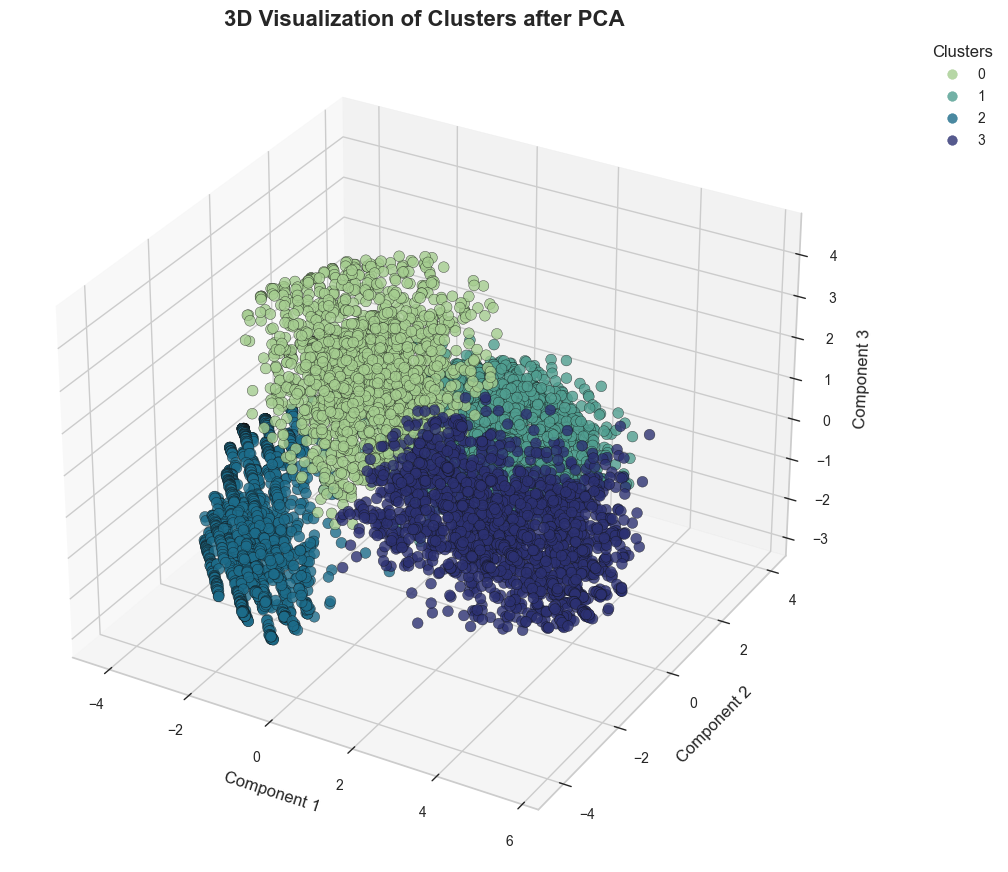

In [45]:
df_comp_analysis['Label'] = clusters

# Create and show the 3D visualization
fig, axs = plt.subplots(figsize = (10,10), subplot_kw = {'projection': '3d'}, constrained_layout = True)

scatter = axs.scatter(
    df_comp_analysis['PC 1'], df_comp_analysis['PC 2'], df_comp_analysis['PC 3'],
    c = df_comp_analysis['Label'], cmap = 'crest', edgecolors = 'k',
    s = 60, alpha = 0.8
)

axs.set_title('3D Visualization of Clusters after PCA', pad = 5, fontsize = 16, fontweight='bold')

axs.set_xlabel('Component 1', labelpad = 10, fontsize = 12)
axs.set_ylabel('Component 2', labelpad = 10, fontsize = 12)
axs.set_zlabel('Component 3', labelpad = 10, fontsize = 12)

axs.legend(*scatter.legend_elements(), title = 'Clusters', loc = 'upper right', bbox_to_anchor = (1.2,1), shadow = True)

plt.show()

## **Cluster Distribution Visualization**

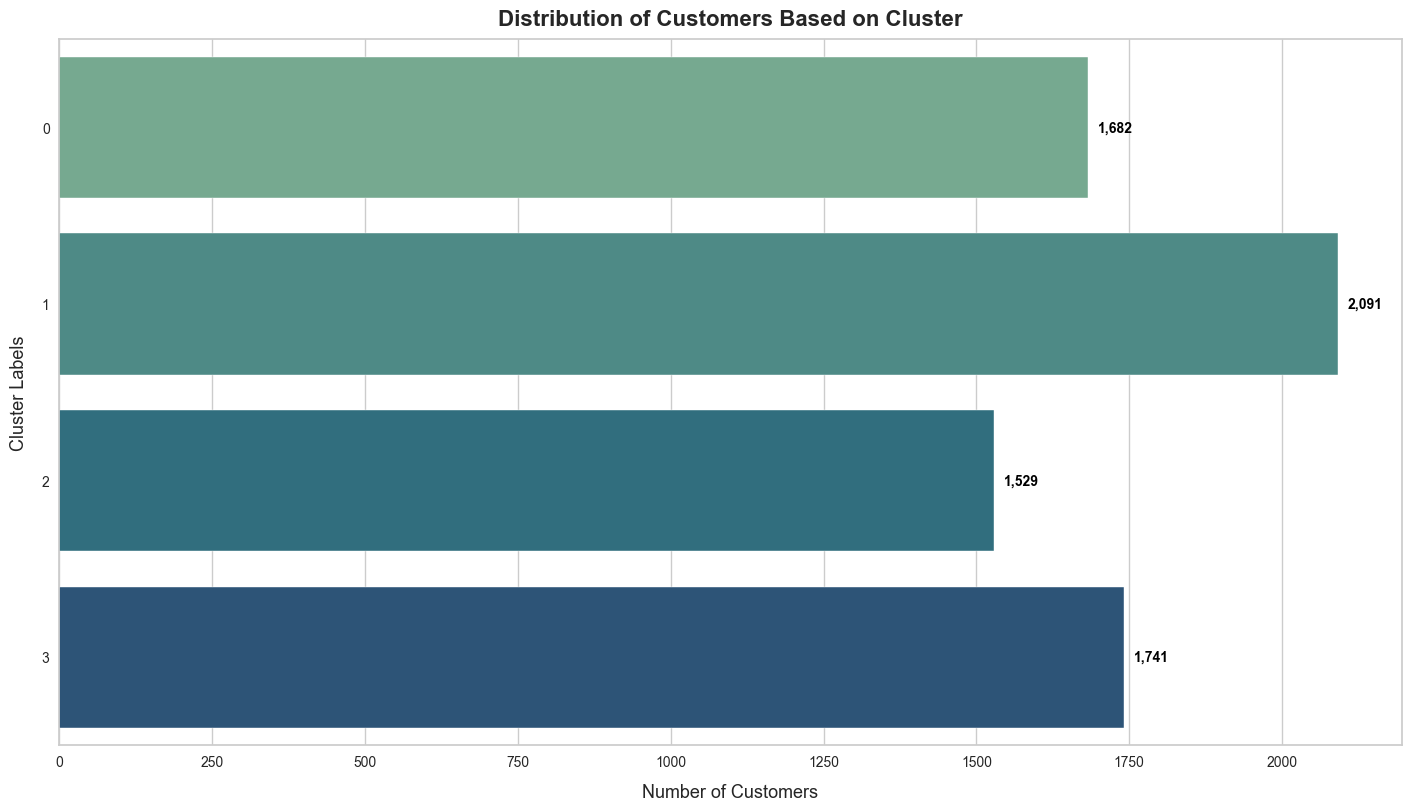

In [46]:
plt.figure(figsize = (14,8) , constrained_layout = True)

axs = sns.countplot(data = df_comp_analysis, y = 'Label', orient = 'h', palette = 'crest')

for patch in axs.patches:
    axs.text(patch.get_width() + 45, patch.get_y() + patch.get_height() / 2, 
             f'{patch.get_width():,.0f}', 
             ha = 'center', va = 'center',
             fontsize = 10, fontweight = 'semibold',
             color = 'black')

plt.title('Distribution of Customers Based on Cluster', pad = 10, fontsize = 16, fontweight = 'bold')

plt.xlabel('Number of Customers', labelpad = 10, fontsize = 13)
plt.ylabel('Cluster Labels'     , labelpad = 10, fontsize = 13)

plt.show()

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
Berdasarkan hasil analisis, terlihat bahwa cluster dengan jumlah pelanggan terbanyak adalah <b>Cluster 1</b> dengan <b>2,091 pelanggan</b>, diikuti oleh <b>Cluster 3</b> sebanyak <b>1,741 pelanggan</b>, <b>Cluster 0</b> dengan <b>1,682 pelanggan</b>, dan yang paling sedikit adalah <b>Cluster 2</b> dengan <b>1,529 pelanggan</b>. Informasi ini memberikan gambaran tentang <b>proporsi distribusi pelanggan</b> dalam setiap cluster, yang dapat digunakan sebagai dasar dalam <b>segmentasi pasar</b>, <b>strategi pemasaran</b>, maupun <b>pengambilan keputusan bisnis</b> lainnya.
</p>

## **Cluster Analysis**

In [47]:
df_cleaned['Cluster'] = clusters

print('Show dataset:')
df_cleaned

Show dataset:


,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Cluster
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,3
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,3
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1


In [48]:
print('Show Summary Based on Consumption Behavior:')
df_cleaned.groupby('Cluster')[['Tenure', 'MonthlyCharges', 'TotalCharges']].mean()

Show Summary Based on Consumption Behavior:


,Tenure,MonthlyCharges,TotalCharges
Cluster,,,
0,21.441736,50.689120,1107.142598
1,19.975132,85.971879,1780.173482
2,30.574232,21.175049,667.517462
3,59.396324,91.162349,5428.738369


In [49]:
print('Show Summary Based on Contract Type:')
(pd.pivot_table(data = df_cleaned, values = 'CustomerID', index = ['Cluster', 'Contract'], aggfunc = 'count').
 rename({'CustomerID': 'Number of Customers'}, axis = 1))

Show Summary Based on Contract Type:


Number of Customers
Cluster Contract                           
0       Month-to-month                 1193
        One year                        360
        Two year                        129
1       Month-to-month                 2026
        One year                         62
        Two year                          3
2       Month-to-month                  524
        One year                        365
        Two year                        640
3       Month-to-month                  132
        One year                        686
        Two year                        923

In [50]:
print('Show Summary Based on Types of Services Used (Internet Service):')
(pd.pivot_table(data = df_cleaned, values = 'CustomerID', index = ['Cluster', 'InternetService'], aggfunc = 'count').
 rename({'CustomerID': 'Number of Customers'}, axis = 1))

Show Summary Based on Types of Services Used (Internet Service):


Number of Customers
Cluster InternetService                     
0       DSL                             1681
        Fiber optic                        1
1       DSL                               16
        Fiber optic                     2075
2       Fiber optic                        3
        No                              1526
3       DSL                              724
        Fiber optic                     1017

In [51]:
print('Show Summary Based on Types of Services Used (Phone Service):')
(pd.pivot_table(data = df_cleaned, values = 'CustomerID', index = ['Cluster', 'PhoneService'], aggfunc = 'count').
 rename({'CustomerID': 'Number of Customers'}, axis = 1))

Show Summary Based on Types of Services Used (Phone Service):


Number of Customers
Cluster PhoneService                     
0       No                            602
        Yes                          1080
1       Yes                          2091
2       Yes                          1529
3       No                             80
        Yes                          1661

In [52]:
print('Show Summary Based on Types of Services Used (Tech Support):')
(pd.pivot_table(data = df_cleaned, values = 'CustomerID', index = ['Cluster', 'TechSupport'], aggfunc = 'count').
 rename({'CustomerID': 'Number of Customers'}, axis = 1))

Show Summary Based on Types of Services Used (Tech Support):


Number of Customers
Cluster TechSupport                     
0       No                          1078
        Yes                          604
1       No                          1807
        Yes                          284
2       No                          1529
3       No                           585
        Yes                         1156

In [53]:
print('Show Summary Based on Types of Services Used (Streaming TV):')
(pd.pivot_table(data = df_cleaned, values = 'CustomerID', index = ['Cluster', 'StreamingTV'], aggfunc = 'count').
 rename({'CustomerID': 'Number of Customers'}, axis = 1))

Show Summary Based on Types of Services Used (Streaming TV):


Number of Customers
Cluster StreamingTV                     
0       No                          1251
        Yes                          431
1       No                          1138
        Yes                          953
2       No                          1529
3       No                           418
        Yes                         1323

In [54]:
print('Show Summary Based on Types of Services Used (Streaming Movies):')
(pd.pivot_table(data = df_cleaned, values = 'CustomerID', index = ['Cluster', 'StreamingMovies'], aggfunc = 'count').
 rename({'CustomerID': 'Number of Customers'}, axis = 1))

Show Summary Based on Types of Services Used (Streaming Movies):


Number of Customers
Cluster StreamingMovies                     
0       No                              1230
        Yes                              452
1       No                              1148
        Yes                              943
2       No                              1529
3       No                               404
        Yes                             1337

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
<b>Moderate Values Newcomers (Cluster 0)</b>
</p>
<ul style="font-family: 'Georgia', serif; text-align: justify; line-height: 1.5;">
  <li> Memiliki masa berlangganan menengah dengan total pengeluaran yang moderat. </li>

  <li> Biaya bulanan cenderung berada pada tingkat sedang. </li>

  <li> Didominasi oleh pelanggan dengan kontrak bulanan. </li>

  <li> Sebagian besar merupakan pengguna layanan DSL. </li>

  <li> Sebagian pelanggan memanfaatkan layanan dukungan teknis dan sambungan telepon. </li>
</ul>

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
<b>High-Value At-Risk Customers (Cluster 1)</b>
</p>
<ul style="font-family: 'Georgia', serif; text-align: justify; line-height: 1.5;">
  <li> Memiliki masa berlangganan yang relatif pendek. </li>

  <li> Mengeluarkan biaya bulanan yang tinggi namun akumulasi total biaya masih rendah. </li>

  <li> Didominasi oleh pelanggan dengan kontrak bulanan. </li>

  <li> Sebagian besar terikat dalam kontrak bulanan. </li>

  <li> Didominasi oleh pengguna layanan <i>fiber optic</i>. </li>

  <li> Mayoritas tidak memanfaatkan layanan dukungan teknis. </li>
</ul>

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
<b>Low-Engagement Value Seekers (Cluster 2)</b>
</p>
<ul style="font-family: 'Georgia', serif; text-align: justify; line-height: 1.5;">
  <li> Memiliki masa berlangganan yang relatif sedang, namun dengan pengeluaran bulanan dan total yang rendah. </li>

  <li> Sebagian besar tidak memanfaatkan layanan internet. </li>

  <li> Mayoritas terikat pada kontrak jangka panjang. </li>

  <li> Umumnya tidak menggunakan layanan dukungan teknis. </li>

  <li> Tetap mempertahankan penggunaan layanan telepon. </li>
</ul>

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
<b>Premium Loyal Customers (Cluster 3)</b>
</p>
<ul style="font-family: 'Georgia', serif; text-align: justify; line-height: 1.5;">
  <li> Memiliki masa berlangganan yang relatif tinggi, disertai dengan tingkat pengeluaran bulanan dan total yang tinggi dan signifikan. </li>

  <li> Didominasi oleh pelanggan dengan kontrak jangka panjang. </li>

  <li> Sebagian besar merupakan pengguna layanan DSL maupun <i>fiber optic</i>. </li>

  <li> Mayoritas memanfaatkan layanan dukungan teknis dan layanan telepon. </li>
</ul>